In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

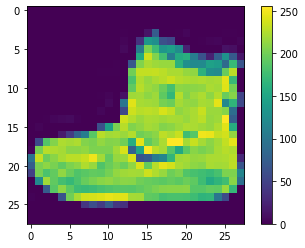

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<font color='blue'>As now we can see that image has 0-255 pixels, so now as a preprocessing step we will scale it between 0-1</font>

In [15]:
train_images = train_images/ 255.0

test_images = test_images/255.0

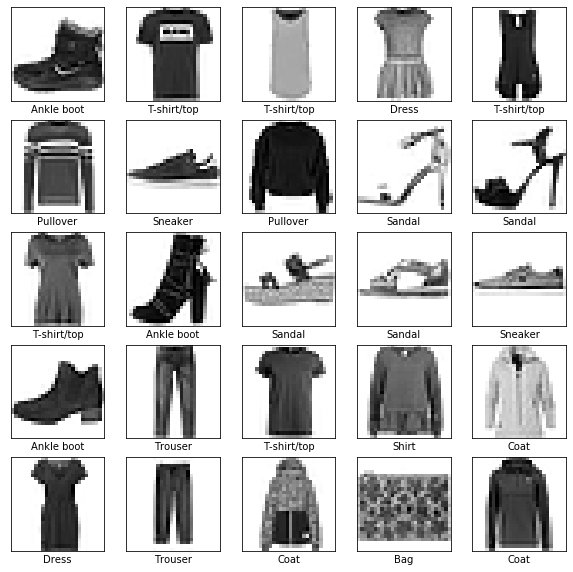

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

A NN requires configuring the layers of the model. So lets configure the layers first

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

<font color='blue'>The above code suggests that
first we take input a 28x28 image and flatten it into single array of size 784

First layer of NN has 128 units and uses relu activation function

Second layer has 10 units and uses softmax activation function

last layer that is second layer has 10 units as it has 10 output classes named from 0...9</font>

<font color='blue'>Now lets compile the model </font>

In [19]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<font color='blue'>Now we will train the model

Train the model requires providing it with train data , that is in this case train_images and train_labels</font>

In [21]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1.0857 - accuracy: 0.6656
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.6383 - accuracy: 0.7696
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5613 - accuracy: 0.7990
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5183 - accuracy: 0.8163
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4896 - accuracy: 0.8280
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4705 - accuracy: 0.8340
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4553 - accuracy: 0.8399
Epoch 8/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4433 - accuracy: 0.8438
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4340 - accuracy: 0.8461
Epoch 10/10
60

<font color='blue'>Now lets see how the model performs on the test data set</font>

In [22]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test Accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.8354


<font color='blue'>Now as our model is ready 

we will use it for predictions</font>

In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([4.2992096e-07, 2.0633864e-08, 3.0604479e-06, 3.4834843e-06,
       7.7238064e-06, 1.5865166e-01, 1.6512737e-05, 4.1743359e-01,
       4.9702893e-03, 4.1891313e-01], dtype=float32)

<font color='blue'>prediction of a particular input is a 10 number array</font>

<font color='blue'>each number denoting the possibility of image belonging to that particular class</font>

In [25]:
np.argmax(predictions[0])

9

 <font color='blue'>Now above the class with max confidence will be predicted</font>

In [26]:
test_labels[0]

9

<font color='blue'>As we can see that the model predicted correct ouput for this particluar example</font>

 <font color='blue'>Now lets create two functions

fnc 1 ----- plot_image
    <font color='brown'> this function will plot the image on which the output was predicted </font>
    
   <font color='brown'> it will also display the output label predicted</font>
    
   <font color='brown'> if predicted output label is correct then text will be in blue</font>
    
  <font color='brown'>  if predicted output label is wrong the text will be in red</font>
    
    
fnc 2 ----- plot_value_array
    
   <font color='brown'> this function will display the graph of confidence levels of each class predicted by our model </font></font>
    

In [45]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color="#777777")
    plt.ylim([0,1])
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

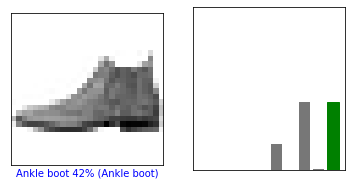

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

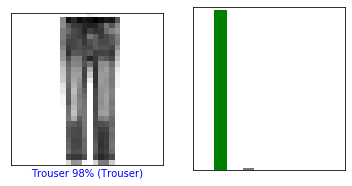

In [47]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

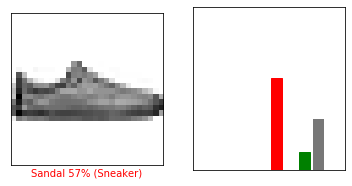

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

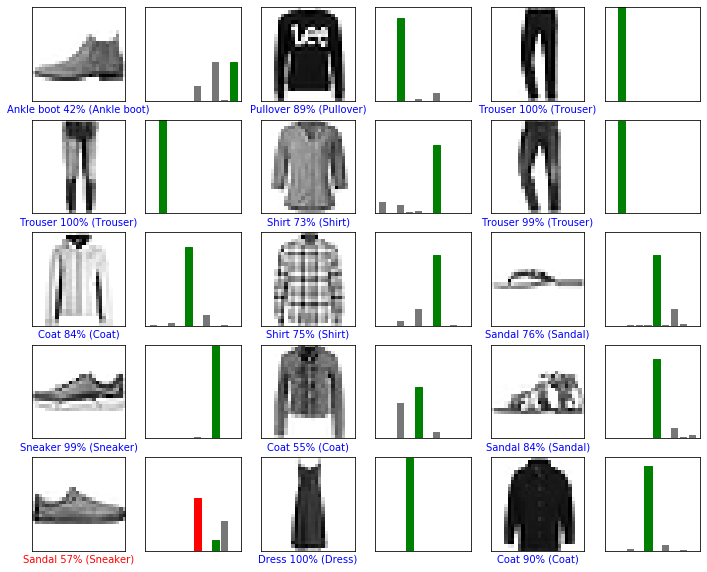

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i,predictions,test_labels)

plt.show()

<font color='blue'>Now we will use a single image and see what prediction our model makes</font>

In [52]:
img = test_images[0]

print(img.shape)

(28, 28)


<font color='blue'>tf.keras models are optimized to make predictions on a batch

So even if we have a single image we will have to put it in a list</font>

In [53]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [54]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2992062e-07 2.0633903e-08 3.0604510e-06 3.4834845e-06 7.7238210e-06
  1.5865187e-01 1.6512753e-05 4.1743341e-01 4.9702921e-03 4.1891316e-01]]


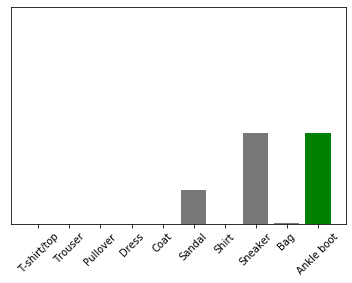

In [55]:
plot_value_array(0,predictions_single,test_labels)

_ = plt.xticks(range(10), class_names, rotation = 45)

In [56]:
np.argmax(predictions_single)

9